### Data Manipulation and Analysis with Python
#### Robert Palmere, 2021
#### Email: rdp135@chem.rutgers.edu
--------------------------------------------------------------------
#### Topics:
1. Using Standard Python
* Retrieving data from external sources
* Altering data (e.g. normalization)
* Data output

####
2. Using NumPy library
* Retrieving data from external sources
* Altering data (e.g. normalization)
* Some Convenience functions of NumPy
* Data output

####
3. Brief Use of Pandas library
* Retrieving data from external sources
* Organizing and Displaying data

####
4. Basic Applications of SymPy

#### Standard Python Data Retrieval (touched on in Session 1):

##### First we will import data from a data set included with the "sklearn" package of Python.
##### This is so that we have a data set to work with throughout the session.
##### These data include attributes of benign and malignant breast cancer cell nuclei of patients in Wisconsin. 
More information on this data set can be found [Here](https://archive.ics.uci.edu/ml/datasets/Breast+Cancer+Wisconsin+(Diagnostic)).

In [2]:
def generate_data():
    from sklearn.datasets import load_breast_cancer # load in data from sklearn
    X, y = load_breast_cancer(return_X_y=True)
    avg_radius = X[:, 0]
    avg_num_concaves = X[:, 7]
    lines = list(zip(avg_radius.astype(str), avg_num_concaves.astype(str)))
    lines = [' '.join(x) for x in lines]
    with open('Data.txt', 'w') as fp:
        fp.writelines('\n'.join(lines))
       
generate_data()

##### Now that we have working data in the "Data.txt" file let's move on to retrieving it using standard Python.

In [3]:
data = open('Data.txt', 'r') # Open() function to returns a Wrapper class with functions to access contents of file using 'read' mode

##### We see that this is a file "IO" (in/out) wrapper data type (class).

In [4]:
print(type(data))

<class '_io.TextIOWrapper'>


##### Let's display the functions contained within this class:

In [5]:
for method in dir(data): print(f"'{method}'", end=' ')

'_CHUNK_SIZE' '__class__' '__del__' '__delattr__' '__dict__' '__dir__' '__doc__' '__enter__' '__eq__' '__exit__' '__format__' '__ge__' '__getattribute__' '__gt__' '__hash__' '__init__' '__init_subclass__' '__iter__' '__le__' '__lt__' '__ne__' '__new__' '__next__' '__reduce__' '__reduce_ex__' '__repr__' '__setattr__' '__sizeof__' '__str__' '__subclasshook__' '_checkClosed' '_checkReadable' '_checkSeekable' '_checkWritable' '_finalizing' 'buffer' 'close' 'closed' 'detach' 'encoding' 'errors' 'fileno' 'flush' 'isatty' 'line_buffering' 'mode' 'name' 'newlines' 'read' 'readable' 'readline' 'readlines' 'reconfigure' 'seek' 'seekable' 'tell' 'truncate' 'writable' 'write' 'write_through' 'writelines' 

##### The 'readlines()' method seems like a reasonable choice to get our data.

In [6]:
import inspect
print(inspect.signature(data.readlines))
print(inspect.signature(open))

(hint=-1, /)
(file, mode='r', buffering=-1, encoding=None, errors=None, newline=None, closefd=True, opener=None)


##### Seems not to take any arguments either. Let's try it.

In [7]:
lines = data.readlines()
print(type(lines))
print(repr(data.readlines)) # Not very useful here.

<class 'list'>
<built-in method readlines of _io.TextIOWrapper object at 0x119dc9ba0>


##### We see that data.readlines() returns a list of the lines within the file. Let's print the first 5 lines to make sure.

In [8]:
print(lines[0:5])

['17.99 0.1471\n', '20.57 0.07017\n', '19.69 0.1279\n', '11.42 0.1052\n', '20.29 0.1043\n']


##### For analysis we want this data to be in numeric form (float) not string. We also want to remove '\n'. Split() does this nicely as it defaults to splitting a list by white space.

In [9]:
for i in range(5): print(lines[i].split())

['17.99', '0.1471']
['20.57', '0.07017']
['19.69', '0.1279']
['11.42', '0.1052']
['20.29', '0.1043']


##### We can now use the map() function of Python to change each element of these lists to floats (Syntax map(func, iterable)).

In [10]:
for i in range(5): print(map(float, lines[i].split()))

##### A map object is just an iterable.

In [11]:
iterable = map(float, ['1', '2', '3'])
for i in iterable: print(i, end=' ')

1.0 2.0 3.0 

##### To fix returning map objects we can just use the list() function to turn the map() returned iteratble into a list.

In [12]:
for i in range(5): print(list(map(float, lines[i].split())))

[17.99, 0.1471]
[20.57, 0.07017]
[19.69, 0.1279]
[11.42, 0.1052]
[20.29, 0.1043]


##### Now let's generate to lists (x, y) from the columns of our data.

In [13]:
avg_radius = []
avg_concavities = []

for line in lines: avg_radius.append(list(map(float, line.split()))[0]) ; avg_concavities.append(list(map(float, line.split()))[1])

print(avg_radius[0:5])
print(avg_concavities[0:5])

[17.99, 20.57, 19.69, 11.42, 20.29]
[0.1471, 0.07017, 0.1279, 0.1052, 0.1043]


##### We can do this with list comprehension as well.

In [14]:
avg_radius = [list(map(float, line.split()))[0] for line in lines]
avg_concavities = [list(map(float, line.split()))[1] for line in lines]

print(avg_radius[0:5])
print(avg_concavities[0:5])

data.close()

[17.99, 20.57, 19.69, 11.42, 20.29]
[0.1471, 0.07017, 0.1279, 0.1052, 0.1043]


##### Now our data is ready for analysis and manipulation by other packages. We can place all of this code into a single method.

In [15]:
def retrieve_data(filename):
    '''
    params: 'filename' - file name containing space-separated data columns in string format
    returns: the first two columns as lists
    '''
    file = open(filename, 'r')
    lines = file.readlines()
    xs = [list(map(float, line.split()))[0] for line in lines]
    ys = [list(map(float, line.split()))[1] for line in lines]
    file.close()
    return xs, ys

x, y = retrieve_data('Data.txt')
print(x[0:5])
print(y[0:5])

[17.99, 20.57, 19.69, 11.42, 20.29]
[0.1471, 0.07017, 0.1279, 0.1052, 0.1043]


##### We can do some simple manipulations on this data. Say normalize the data such that it spans [0, 1] with the maximum value of the list being 1.

In [18]:
norm_x = [i/max(x) for i in x]
norm_y = [i/max(y) for i in y]

##### Here are some other basic functionalities that we can implement on our data without external libraries.

In [19]:
# Average
def mean(i):
    return sum(i)/len(i)

avg_x = mean(x)
avg_y = mean(y)
print(avg_x, avg_y)

14.127291739894563 0.048919145869947236


In [20]:
# Standard Deviation
def sqrt(value):
    return value**(1/2)

def std(i):
    mean = sum(i)/len(i)
    s = sum([((x - mean)**2) for x in i])
    return sqrt(s/len(i))

print(std(x), std(y))

3.5209507607110626 0.03876873246147475


In [21]:
# Sum
sum_x = sum(x)
sum_y = sum(y)
print(sum_x, sum_y)

8038.429000000006 27.834993999999977


In [22]:
# Max / Min
x_max = max(x)
x_min = min(x)
print(x_max, x_min)

28.11 6.981


In [23]:
# Index where Max / Min found - since x, y are lists we can use the index method

min_indx = x.index(x_min)
max_indx = x.index(x_max)
print(min_indx, max_indx)
print(x[min_indx], x[max_indx])

101 212
6.981 28.11


##### Say after we normalize the data such that the max value of each list is equal to 1 that we want to write a file with this output.

In [24]:
def output_normalized(x_norm, y_norm):
    '''
    Function to write normalized x, y data to text file in cwd
    params:
        x_norm - list of normalized x values
        y_norm - list of noramlized y values
    '''
    lines = list(zip(list(map(str, x_norm)), list(map(str, y_norm))))
    lines = [' '.join(x) for x in lines]
    with open('Output.txt', 'w') as fp:
        fp.writelines('\n'.join(lines))
        
output_normalized(norm_x, norm_y)

#### NumPy

##### We can do the same types of things with the conveniently pre-written functions in the NumPy library.

##### So why not just stay using the original instead of NumPy? NumPy is faster for the most part.

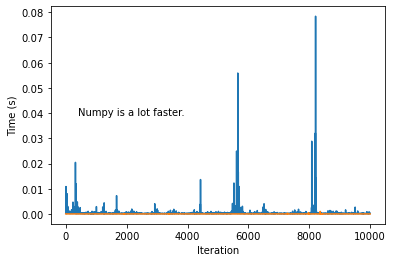

In [25]:
import numpy as np
from timeit import default_timer as timer

def speedtest(key, length):
    d = {'array' : np.array([x for x in range(length)]),
         'list' : [x for x in range(length)]}
    time = []
    if key == list(d.keys())[0]:
        for i in range(10000):
            start = timer()

            mult = d['array'] * d['array']

            end = timer()
            dt = end - start
            time.append(dt)
    elif key == list(d.keys())[1]:
        for i in range(10000):
            start = timer()

            for n, i in enumerate(d['list']):
                mult = d['list'][n] * d['list'][n]

            end = timer()
            dt = end - start
            time.append(dt)
    return time

t = speedtest('list', 1000)
t2 = speedtest('array', 1000)

import matplotlib.pyplot as plt
plt.plot(t)
plt.plot(t2)
plt.ylabel('Time (s)')
plt.xlabel('Iteration')
plt.text(400, np.max(t)/2, s="Numpy is a lot faster.");

##### Why is this though? -- In this case, numpy arrays don't have to multiply indices individually as one would have to using a list.

However, this really only pertains to large arrays.

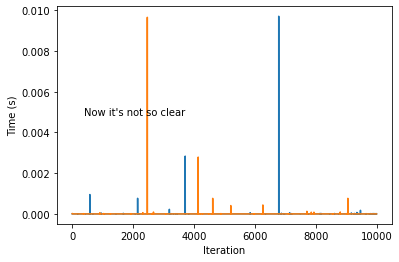

In [26]:
test1 = [1, 2, 3, 4, 5, 6, 7, 8, 9, 10]
test2 = np.asarray([1, 2, 3, 4, 5, 6, 7, 8, 9, 10])

t = speedtest('list', 3)
t2 = speedtest('array', 3)
plt.plot(t)
plt.plot(t2)
plt.ylabel('Time (s)')
plt.xlabel('Iteration')
plt.text(400, np.max(t)/2, s="Now it's not so clear");

In [27]:
f = 'Data.txt'
data = np.loadtxt(f)
print(type(data))

<class 'numpy.ndarray'>


In [28]:
for method in dir(data):  print(f"'{method}'", end=' ')

'T' '__abs__' '__add__' '__and__' '__array__' '__array_finalize__' '__array_function__' '__array_interface__' '__array_prepare__' '__array_priority__' '__array_struct__' '__array_ufunc__' '__array_wrap__' '__bool__' '__class__' '__complex__' '__contains__' '__copy__' '__deepcopy__' '__delattr__' '__delitem__' '__dir__' '__divmod__' '__doc__' '__eq__' '__float__' '__floordiv__' '__format__' '__ge__' '__getattribute__' '__getitem__' '__gt__' '__hash__' '__iadd__' '__iand__' '__ifloordiv__' '__ilshift__' '__imatmul__' '__imod__' '__imul__' '__index__' '__init__' '__init_subclass__' '__int__' '__invert__' '__ior__' '__ipow__' '__irshift__' '__isub__' '__iter__' '__itruediv__' '__ixor__' '__le__' '__len__' '__lshift__' '__lt__' '__matmul__' '__mod__' '__mul__' '__ne__' '__neg__' '__new__' '__or__' '__pos__' '__pow__' '__radd__' '__rand__' '__rdivmod__' '__reduce__' '__reduce_ex__' '__repr__' '__rfloordiv__' '__rlshift__' '__rmatmul__' '__rmod__' '__rmul__' '__ror__' '__rpow__' '__rrshift__'

##### Other ways to retrieve data from a file using NumPy:

In [29]:
np.genfromtxt(f) # Better for incomplete CSVs etc with function keyword options such as "filling_values="

array([[17.99   ,  0.1471 ],
       [20.57   ,  0.07017],
       [19.69   ,  0.1279 ],
       ...,
       [16.6    ,  0.05302],
       [20.6    ,  0.152  ],
       [ 7.76   ,  0.     ]])

##### We can see that the methods we wrote in standard Python are available for a NumPy array.

In [30]:
data.shape # The shape of the matrix (569 rows with 2 columns)

(569, 2)

##### We can use usual slicing methods to define x and y.

In [31]:
x = np.asarray(data[:, 0])
y = np.asarray(data[:, 1]) # We use np.asarray() to convert from list back to 1D NumPy array
print(type(x))
print(x[0:5])

<class 'numpy.ndarray'>
[17.99 20.57 19.69 11.42 20.29]


##### Now using NumPy let's manipulate the data sets as we did above. Notice NumPy did the data cleaning for us.

In [32]:
# Averages

x_avg = np.mean(x)
y_avg = np.mean(y)
print(x_avg, y_avg)

14.127291739894552 0.04891914586994728


In [33]:
# Sqrt
np.sqrt(2)

1.4142135623730951

In [34]:
# Standard Dev.
np.std(x)

3.520950760711062

In [35]:
# Sums
x.sum() # or
np.sum(x)

8038.429

In [36]:
xnorm = x/np.max(x) # Note that / operation carried out for each element of the np.array

# Can also use NumPy functions for these mathematical operations

test = np.divide(x, np.max(x))
np.any(test == xnorm)

True

##### We can find out what np.any() is doing here from its __doc__ string special method.
##### The Python interpreter automatically sets the first string literal as what __doc__ of a class or method returns.

In [37]:
def example():
    '''Super helpful doc string.'''

example.__doc__

def doc(func):
    if callable(func):
        return func.__doc__
    else:
        raise ValueError('Argument must be a function.')

In [38]:
doc(example) # Our function works

'Super helpful doc string.'

In [39]:
doc(x) # If the argument is not callable (e.g. doesn't have __call__ method) -- All functions have __call__

ValueError: Argument must be a function.

In [40]:
print(type(example))

<class 'function'>


In [41]:
print(np.any.__doc__) 


    Test whether any array element along a given axis evaluates to True.

    Returns single boolean unless `axis` is not ``None``

    Parameters
    ----------
    a : array_like
        Input array or object that can be converted to an array.
    axis : None or int or tuple of ints, optional
        Axis or axes along which a logical OR reduction is performed.
        The default (``axis=None``) is to perform a logical OR over all
        the dimensions of the input array. `axis` may be negative, in
        which case it counts from the last to the first axis.

        .. versionadded:: 1.7.0

        If this is a tuple of ints, a reduction is performed on multiple
        axes, instead of a single axis or all the axes as before.
    out : ndarray, optional
        Alternate output array in which to place the result.  It must have
        the same shape as the expected output and its type is preserved
        (e.g., if it is of type float, then it will remain so, returning
        

##### In fact, conditionals apply element-wise for np.arrays

In [45]:
t1 = np.asarray([[1, 2], [3, 4]])
t2 = np.asarray([[1, 6], [7, 8]])

t2 > t1 # Elements of t2 which have equivalent indices with t1 are greater

array([[False,  True],
       [ True,  True]])

#### Convenience Functions

In [43]:
a = np.array([1, 2, 3, 4, 5, 6])
a.reshape(2, 3) # Two rows three columns

array([[1, 2, 3],
       [4, 5, 6]])

In [46]:
# We can try to restore the array using reshape, but notice that the array is not flattened
print(a.reshape(1, a.size))

[[1 2 3 4 5 6]]


In [47]:
# Ravel will flatten the array into a single 1D array
a = a.ravel()
print(a)

[1 2 3 4 5 6]


In [48]:
np.zeros(3) # Null matrix

array([0., 0., 0.])

In [49]:
np.ones(3) # All-ones matrix

array([1., 1., 1.])

In [50]:
id_mat = np.identity(3) # Identity Matrix
print(id_mat)

[[1. 0. 0.]
 [0. 1. 0.]
 [0. 0. 1.]]


In [51]:
np.trace(id_mat) # Trace (sum along the i=j elements of matrix)

3.0

In [52]:
n1 = np.array([0, 0, 0])
n2 = np.array([1, 1, 1])
print(np.vstack((n1, n2))) # stack arrays vertically
print(np.hstack((n1, n2))) # stack arrays horizontally

[[0 0 0]
 [1 1 1]]
[0 0 0 1 1 1]


In [53]:
tiled = np.tile(n1, (3, 3)) # we can "tile" or repeat an array over (i,j) iterations
print(tiled)
print(tiled.size)

[[0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0]]
27


In [54]:
new_tiled = np.insert(tiled, 5, 1)
print(new_tiled)
print(new_tiled.shape)
new_tiled = np.delete(new_tiled, 0) # Delete element index 0
print(new_tiled.shape)

[0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
(28,)
(27,)


In [55]:
new_tiled.reshape(3, 9)

array([[0, 0, 0, 0, 1, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 0]])

In [ ]:
print(new_tiled) # doesn't affect original array

In [56]:
np.hsplit(new_tiled, 3) # Similar to reshape() but generates a list of arrays one for each row

[array([0, 0, 0, 0, 1, 0, 0, 0, 0]),
 array([0, 0, 0, 0, 0, 0, 0, 0, 0]),
 array([0, 0, 0, 0, 0, 0, 0, 0, 0])]

In [57]:
print(new_tiled[4])
print(np.roll(new_tiled, 1)[5]) # roll shifts values of set axis over by 1
print(new_tiled)
print(np.roll(new_tiled, 1)) # useful for periodic boundary conditions

1
1
[0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
[0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]


In [58]:
new_tiled.fill(0) # affects original array to set all elements to zero
print(new_tiled)

[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]


In [59]:
np.random.rand(1, 3) # Random floats on interval [0, 1]

array([[0.91745772, 0.37881851, 0.7108944 ]])

In [60]:
np.arange(0, 10.1, .1, dtype=float) # advantage over range() - can use other types (Syntax: [start, stop, step])

array([ 0. ,  0.1,  0.2,  0.3,  0.4,  0.5,  0.6,  0.7,  0.8,  0.9,  1. ,
        1.1,  1.2,  1.3,  1.4,  1.5,  1.6,  1.7,  1.8,  1.9,  2. ,  2.1,
        2.2,  2.3,  2.4,  2.5,  2.6,  2.7,  2.8,  2.9,  3. ,  3.1,  3.2,
        3.3,  3.4,  3.5,  3.6,  3.7,  3.8,  3.9,  4. ,  4.1,  4.2,  4.3,
        4.4,  4.5,  4.6,  4.7,  4.8,  4.9,  5. ,  5.1,  5.2,  5.3,  5.4,
        5.5,  5.6,  5.7,  5.8,  5.9,  6. ,  6.1,  6.2,  6.3,  6.4,  6.5,
        6.6,  6.7,  6.8,  6.9,  7. ,  7.1,  7.2,  7.3,  7.4,  7.5,  7.6,
        7.7,  7.8,  7.9,  8. ,  8.1,  8.2,  8.3,  8.4,  8.5,  8.6,  8.7,
        8.8,  8.9,  9. ,  9.1,  9.2,  9.3,  9.4,  9.5,  9.6,  9.7,  9.8,
        9.9, 10. ])

In [61]:
range(0, 10.1, .1) # Range can't handle non-integers

TypeError: 'float' object cannot be interpreted as an integer

In [62]:
ex = np.asarray([['Human', 'Gorilla', 'Chimpanzee'], [60, 70, 80]])
print(ex)

[['Human' 'Gorilla' 'Chimpanzee']
 ['60' '70' '80']]


In [63]:
print(np.sort(ex, axis=1)) # axis = 1 is the x-axis in numpy

# Notice that although first row is sorted, the corresponding values have not?

[['Chimpanzee' 'Gorilla' 'Human']
 ['60' '70' '80']]


In [64]:
indxs = np.argsort(ex[0, :]) # return the indices after sorting and then apply to the original array
print(indxs)

[2 1 0]


In [65]:
ex = ex[:, indxs]
print(ex) # Sorted by alphabetical

[['Chimpanzee' 'Gorilla' 'Human']
 ['80' '70' '60']]


##### Output with NumPy

In [66]:
np.savetxt('numpy_output.txt', ex, fmt='%s', delimiter=' ')

In [67]:
ex.tofile('numpy_output.txt', sep=' ')

There are many more function that are not covered here.

#### Pandas Library

In [68]:
import pandas as pd

In [69]:
# pd.read_fwf() "Fixed width formatted"
data = pd.read_fwf('Data.txt', header=None)
print(type(data)) # Stores as data frame object

<class 'pandas.core.frame.DataFrame'>


In [70]:
data = pd.read_csv('Data.txt', sep=" ", header=None)
print(type(data)) # Stores as data frame object
print(data)

<class 'pandas.core.frame.DataFrame'>
         0        1
0    17.99  0.14710
1    20.57  0.07017
2    19.69  0.12790
3    11.42  0.10520
4    20.29  0.10430
..     ...      ...
564  21.56  0.13890
565  20.13  0.09791
566  16.60  0.05302
567  20.60  0.15200
568   7.76  0.00000

[569 rows x 2 columns]


In [71]:
data = data.rename(columns={0: "Average Radius", 1: "Average # Concavities"})
print(data)

     Average Radius  Average # Concavities
0             17.99                0.14710
1             20.57                0.07017
2             19.69                0.12790
3             11.42                0.10520
4             20.29                0.10430
..              ...                    ...
564           21.56                0.13890
565           20.13                0.09791
566           16.60                0.05302
567           20.60                0.15200
568            7.76                0.00000

[569 rows x 2 columns]


In [72]:
data.head() # First 5 entries 

,Average Radius,Average # Concavities
0,17.99,0.14710
1,20.57,0.07017
2,19.69,0.12790
3,11.42,0.10520
4,20.29,0.10430


In [73]:
data.tail() # Last 5 entries

,Average Radius,Average # Concavities
564,21.56,0.13890
565,20.13,0.09791
566,16.60,0.05302
567,20.60,0.15200
568,7.76,0.00000


In [74]:
data.info() # General information about the df

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 2 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   Average Radius         569 non-null    float64
 1   Average # Concavities  569 non-null    float64
dtypes: float64(2)
memory usage: 9.0 KB


In [75]:
data['Average Radius'] # We can select data columns using keywords

0      17.99
1      20.57
2      19.69
3      11.42
4      20.29
       ...  
564    21.56
565    20.13
566    16.60
567    20.60
568     7.76
Name: Average Radius, Length: 569, dtype: float64

In [76]:
type(data['Average Radius'].array) # some NumPy functionalities included in Pandas

pandas.core.arrays.numpy_.PandasArray

In [77]:
np.asarray(data['Average Radius']).sum() # Ex

8038.429

In [78]:
data['Average Radius'].sum()

8038.429

In [79]:
data.iloc[:,1] # indexing can be done with the iloc() function

0      0.14710
1      0.07017
2      0.12790
3      0.10520
4      0.10430
        ...   
564    0.13890
565    0.09791
566    0.05302
567    0.15200
568    0.00000
Name: Average # Concavities, Length: 569, dtype: float64

In [80]:
data.describe() # Quick way of gathering measures of central tendency 

,Average Radius,Average # Concavities
count,569.000000,569.000000
mean,14.127292,0.048919
std,3.524049,0.038803
min,6.981000,0.000000
25%,11.700000,0.020310
50%,13.370000,0.033500
75%,15.780000,0.074000
max,28.110000,0.201200


In [81]:
data.isna().any() # Check if any values are missing

Average Radius           False
Average # Concavities    False
dtype: bool

In [82]:
data.corr() # Pearson Correlation shows a high correlation (>.8) between radius and the number of concavities.
# Hypothesis: Abnormal nucleus expansion results in structural difficiencies resulting in concavities
# Note: Correlation does not mean causation

,Average Radius,Average # Concavities
Average Radius,1.000000,0.822529
Average # Concavities,0.822529,1.000000


In [83]:
df = pd.DataFrame({'Animal': ['Falcon', 'Falcon','Parrot', 'Parrot'], 'Max Speed': [380., 370., 24., 26.]})
df

,Animal,Max Speed
0,Falcon,380.0
1,Falcon,370.0
2,Parrot,24.0
3,Parrot,26.0


In [84]:
df.groupby(['Animal']).mean()

,Max Speed
Animal,
Falcon,375.0
Parrot,25.0


#### Basic SymPy - Symbolic Computation in Python

In [85]:
from sympy import *

In [86]:
x, y, t = symbols('x y t')
print(x, y, t)

x y t


In [87]:
diff(sin(x))

cos(x)

In [88]:
x**2

x**2

In [89]:
diff(x**2)

2*x

In [90]:
integrate(sin(x)) # Analytical 

-cos(x)

In [91]:
integrate(sin(x), (x, pi/2, pi)) # Definite

1

In [92]:
limit(sin(x), x, pi/2) # Limits

1

In [93]:
y = Function('y')
print(y)

y


Solve the differential equation 𝑦″−𝑦=𝑒^𝑡

In [94]:
dsolve(Eq(y(t).diff(t, t) - y(t), exp(t)), y(t)) # required variable as 't'

Eq(y(t), C2*exp(-t) + (C1 + t/2)*exp(t))

Let's plot the results just to see what our solution looks like (we will go over plotting in more detail a future session).

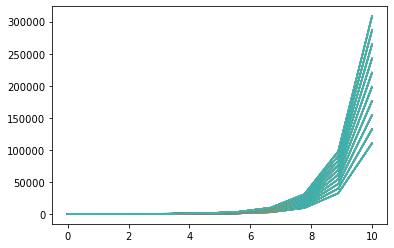

In [95]:
import matplotlib.pyplot as plt
import numpy as np

def y(ts, c1, c2): # set c1, c2 = 1
    return c2*np.exp(-t)+(c1+t/2)*np.exp(t)

t = np.linspace(0, 10, 10)

for i in range(10):
    for j in range(10):
        plt.plot(t, y(t, i, j))

plt.show() # The rate changes as a function of c1, c2

In [96]:
factor(x**3 + x**2 + x + 1)

(x + 1)*(x**2 + 1)

#### Applications to Chemical Systems

##### **1.) Balancing Chemical Equations**

Balancing chemical equations by hand is discussed during introductory chemistry classes. Let's write a function using SymPy to do the work for us. We will generate a matrix of coefficients for each atom and then convert the matrix to reduced row echelon form (RREF) for our answer.

C<sub>3</sub>H<sub>8</sub> + O<sub>2</sub> &#8594; CO<sub>2</sub> + H<sub>2</sub>O

We want to balance the combustion equation for propane. The matrix for this system by element is:

In [97]:
from sympy import *
import numpy as np
Matrix([['a', 'b', 'c', 'd'], [3, 0, -1, 0], [8, 0, 0, -2], [0, 2, -2, -1]])

Matrix([
[a, b,  c,  d],
[3, 0, -1,  0],
[8, 0,  0, -2],
[0, 2, -2, -1]])

Here a, b, c, and d are our desired coefficients in front of each chemical.

The procedure to acquire RREF: Perform row operations until the first non-zero entry (the "pivot") in each row is 1, the last row has all zeros, and all numbers above and below each pivot number (1) is zero.

Legal row operations:

1. Switching row positions
2. Mutliplying a row by a number
3. Adding rows together

We can write our own code following the pseudo-code presented on [wikipedia](https://en.wikipedia.org/wiki/Row_echelon_form), or we can write a shorter function using SymPy which is what we'll do here.

In [98]:
matrix = np.array([[3, 0, -1, 0], [8, 0, 0, -2], [0, 2, -2, -1]])
print(matrix)

[[ 3  0 -1  0]
 [ 8  0  0 -2]
 [ 0  2 -2 -1]]


In [99]:
Matrix(matrix).rref()

(Matrix([
 [1, 0, 0, -1/4],
 [0, 1, 0, -5/4],
 [0, 0, 1, -3/4]]),
 (0, 1, 2))

This is means:\
a = -1/4d\
b = -5/4d\
c = -3/4d

d is the factor to require to achieve integer values for our coefficients (lowest common denominator which is f).

In [100]:
def balance(m):
    cols = ('a', 'b', 'c', 'd', 'e', 'f', 'g')
    a = Matrix(matrix).rref()
    for n, i in enumerate(range(3, len(a[0]), 4)):
        value = a[0][i]
        denom = fraction(together(value))[1]
        print('{} = {}'.format(cols[n], abs(value*denom)))
    print('{} = {}'.format(cols[n+1], denom)) # Notice 'n' is saved from enumerate

In [102]:
balance(matrix)

a = 1
b = 5
c = 3
d = 4


Balanced Equation: C<sub>3</sub>H<sub>8</sub> + **5**O<sub>2</sub> &#8594; **3**CO<sub>2</sub> + **4**H<sub>2</sub>O

NumPy does not have this functionality. If you'd like practice and want to contribute this function to NumPy check out [this](https://numpy.org/doc/stable/dev/index.html) link. The pseudo-code for RREF can be found on [wikipedia](https://en.wikipedia.org/wiki/Row_echelon_form).

##### **2.) Chemical Kinetics**

In the previous example, we saw that coefficients of elementary chemical equations can be calculated by formulating a matrix.

We can also integrate chemical rate equations using linear algebra as outlined in [this](https://pubs.acs.org/doi/pdf/10.1021/ed067p375) paper by the Journal of Chemical Education.

The steps are:

1. Generate a matrix, K, of the rate constants.
2. Compute the eigenvalues and eigenvectors of the matrix.
3. Compute the scalar coefficients

Let's do this for the example of two unimolecular steps presented in the paper using NumPy.

X<sub>1</sub> &#8594;<sup>k<sub>1</sub></sup> X<sub>2</sub> &#8594; <sup>k<sub>2</sub></sup> X<sub>3</sub>

The rate equations are:
    
   dX<sub>1</sub>/dt = -k<sub>1</sub>X<sub>1</sub>\
   dX<sub>2</sub>/dt = k<sub>1</sub>X<sub>2</sub> - k<sub>2</sub></sub>X<sub>2</sub>\
   dX<sub>3</sub>/dt = k<sub>2</sub>X<sub>3</sub>
   
So the matrix containing the rates is:

In [114]:
k1, k2 = symbols('k1 k2')
K = Matrix([['-k1', 0, 0], ['k1', '-k2', 0], [0, 'k2', 0]])
K

Matrix([
[-k1,   0, 0],
[ k1, -k2, 0],
[  0,  k2, 0]])

In [104]:
K.eigenvals() # Returns a dictionary where the keys are the eigenvalues

{-k1: 1, -k2: 1, 0: 1}

In [105]:
K.eigenvects() # Returns a list of eigenvalues and their corresponding eigenvectors

[(0,
  1,
  [Matrix([
   [0],
   [0],
   [1]])]),
 (-k1,
  1,
  [Matrix([
   [k1/k2 - 1],
   [   -k1/k2],
   [        1]])]),
 (-k2,
  1,
  [Matrix([
   [ 0],
   [-1],
   [ 1]])])]

In [106]:
X = Matrix(['X1', 'X2', 'X3']) # a single list is considered a column vector for SymPy
X

Matrix([
[X1],
[X2],
[X3]])

In [107]:
C = Matrix([['k1/k2-1',0,0],['-k1/k2',0,-1],[1,1,1]]) # rows are our eigenvectors
C

Matrix([
[k1/k2 - 1, 0,  0],
[   -k1/k2, 0, -1],
[        1, 1,  1]])

In [108]:
CT = Matrix(transpose(C)) # Take the transpose and swap second and third rows
CT.row_swap(1, 2)
CT

Matrix([
[k1/k2 - 1, -k1/k2, 1],
[        0,     -1, 1],
[        0,      0, 1]])

In [115]:
simplify(CT.row(0)*-k2)# Multiplied first row by -k2 then second row by -1

Matrix([[k2*(k1 - k2), 0, 0]])

In [116]:
CT = Matrix([['k2-k1', 0, 0], ['k1', 1, 0], ['-k2', -1, 1]])
CT

Matrix([
[-k1 + k2,  0, 0],
[      k1,  1, 0],
[     -k2, -1, 1]])

This is fair game because C<sup>T</sup> = C since AX=${\lambda}$X and A<sup>T</sup>=${\lambda}$X

We can get $\alpha$ by taking the inverse of C<sub>n</sub> and multiplying it with X<sub>n</sub>. $\alpha$ = C<sub>n</sub><sup>-1</sup>X<sub>n</sub>

In [117]:
a = CT.inv()*X # a (alpha) contains our scalar coefficients
a

Matrix([
[         X1/(-k1 + k2)],
[-X1*k1/(-k1 + k2) + X2],
[          X1 + X2 + X3]])

Our original equation was a set of first order differential equations.For reasons we won't go over here, our solutions to X<sub>n</sub>(t) will be exponential functions.

e.g. $\vec{x(t)}$' = A$\vec{x(t)}$ has solutions $\vec{x(t)}$ = $\vec{c}$exp($\lambda$t)

The paper derives: ![title](./DEsoln.png)

We have all the components to solve X<sub>n</sub>(t) so let's plug them in and check out the results.

In [112]:
print(*list(K.eigenvals().keys())) # Eigenvalues

-k1 -k2 0


${\alpha}$<sub>1</sub>C<sub>1</sub>exp(${\lambda}$<sub>1</sub>t)

In [118]:
t = symbols('t')
Matrix(a[0]*CT.col(0)*exp(-k1*t))[0]

X1*exp(-k1*t)

${\alpha}$<sub>1</sub>C<sub>1</sub>exp(${\lambda}$<sub>1</sub>t) + ${\alpha}$<sub>2</sub>C<sub>2</sub>exp(${\lambda}$<sub>2</sub>t)

In [119]:
Matrix(a[0]*CT.col(0)*exp(-k1*t)+a[1]*CT.col(1)*exp(-k2*t))[1]

X1*k1*exp(-k1*t)/(-k1 + k2) + (-X1*k1/(-k1 + k2) + X2)*exp(-k2*t)

${\alpha}$<sub>1</sub>C<sub>1</sub>exp(${\lambda}$<sub>1</sub>t) + ${\alpha}$<sub>2</sub>C<sub>2</sub>exp(${\lambda}$<sub>2</sub>t) + ${\alpha}$<sub>3</sub>C<sub>3</sub>exp(${\lambda}$<sub>3</sub>t)

In [120]:
Matrix(a[0]*CT.col(0)*exp(-k1*t)+a[1]*CT.col(1)*exp(-k2*t)+a[2]*CT.col(2)*exp(0))[2]

-X1*k2*exp(-k1*t)/(-k1 + k2) + X1 + X2 + X3 + (X1*k1/(-k1 + k2) - X2)*exp(-k2*t)

Now that we have our solutions for X(t)<sub>1</sub>, X(t)<sub>2</sub>, X(t)<sub>3</sub>, let's plot these solutions. Given a starting concentration of 1 for X<sub>1</sub>, X<sub>2</sub>, and X<sub>3</sub>.

In [121]:
import matplotlib.pyplot as plt

ts = np.linspace(0, 10, num=50)

# Functions for each chemical species
def s1(x1, k1, t):
    return x1*np.exp(-k1*t)

def s2(x1, x2, k1, k2, t):
    return (x1*k1)/(-k1*k2)*np.exp(-k1*t) + (((-x1*k1)/(-k1+k2))+x2)*np.exp(-k2*t)

def s3(x1, x2, x3, k1, k2, t):
    return -(x1*k2)/(-k1*k2)*np.exp(-k1*t)+x1+x2+x3+(((x1*k1)/(-k1+k2))-x2)*np.exp(-k2*ts)

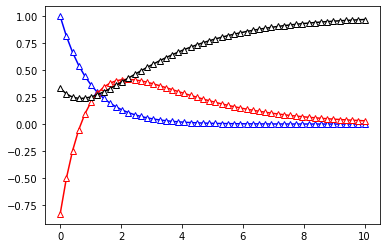

In [123]:
plt.plot(ts, s1(1, 1, ts), '-b^', mfc='white')
plt.plot(ts, s2(1, 0, 1, .4, ts),'-r^', mfc='white')
plt.plot(ts, s3(1, 0, 0, 1, .4, ts), '-k^', mfc='white')
plt.show()

In [128]:
x = np.asarray([])
type(x)

numpy.ndarray

In [129]:
df = pd.DataFrame()